# Ames Housing
## EDA

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 500) # This will allow me to view 500 rows in the notebook
pd.set_option('display.max_rows', 500) # This will allow me to view 500 rows in the notebook

In [3]:
df_train = pd.read_csv('./datasets/train_clean_r.csv') # Reading in the training set
df_test = pd.read_csv('./datasets/test_clean_r.csv') # Reading in the test set

In [4]:
df_train.head() # Taking a look at the first few rows of the data frames

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,3,2010,WD,138500


In [5]:
# Setting the index for our data frame according to one of the columns (Id)
df_train = df_train.set_index('Id')
df_test = df_test.set_index('Id')

In [6]:
df_train.describe() # Looking at some descriptive statistics

,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,1.926000e+03,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000
mean,7.207163e+08,55.428349,10200.976116,6.076324,5.597092,1970.500519,1983.388889,98.262429,444.509865,50.587747,562.892523,1057.990135,1168.706127,322.712357,5.479751,1496.898235,0.429907,0.066978,1.562305,0.359813,2.868640,1.044652,6.457425,0.603323,1.767913,469.785395,96.193666,44.287643,23.138629,2.598650,17.263240,2.304258,46.066978,6.210280,2007.768432,180755.776739
std,1.887657e+08,41.360761,6700.981111,1.393450,1.116428,29.668607,20.886530,167.528185,442.028044,168.815862,442.962001,427.954120,379.990825,425.726128,51.313109,491.972823,0.523741,0.258226,0.550807,0.499168,0.829259,0.214003,1.542137,0.640186,0.769300,214.573897,130.237670,63.084329,60.743968,25.462871,58.696612,37.434533,448.006048,2.736557,1.312224,79541.445980
min,5.263011e+08,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,5.284350e+08,20.000000,7655.750000,5.000000,5.000000,1953.000000,1964.000000,0.000000,0.000000,0.000000,217.000000,798.000000,886.250000,0.000000,0.000000,1120.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,312.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129212.500000
50%,9.021031e+08,50.000000,9554.500000,6.000000,5.000000,1972.000000,1991.000000,0.000000,374.500000,0.000000,474.000000,1000.000000,1097.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,477.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,9.071871e+08,70.000000,11668.500000,7.000000,6.000000,1999.000000,2003.000000,160.000000,736.750000,0.000000,806.000000,1322.750000,1413.250000,684.000000,0.000000,1731.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,212999.750000
max,9.241520e+08,190.000000,159000.000000,10.000000,9.000000,2009.000000,2010.000000,1115.000000,2188.000000,1474.000000,2336.000000,3206.000000,3820.000000,1862.000000,1064.000000,3820.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,14.000000,4.000000,5.000000,1356.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,12500.000000,12.000000,2010.000000,611657.000000


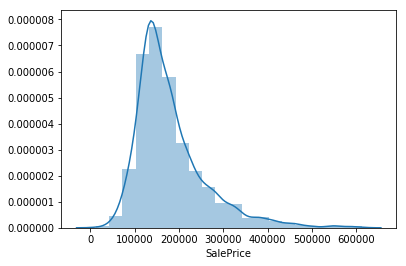

In [51]:
sns.distplot(df_train['SalePrice'], bins=20); # Getting an idea of the distribution of sale price, our target variable

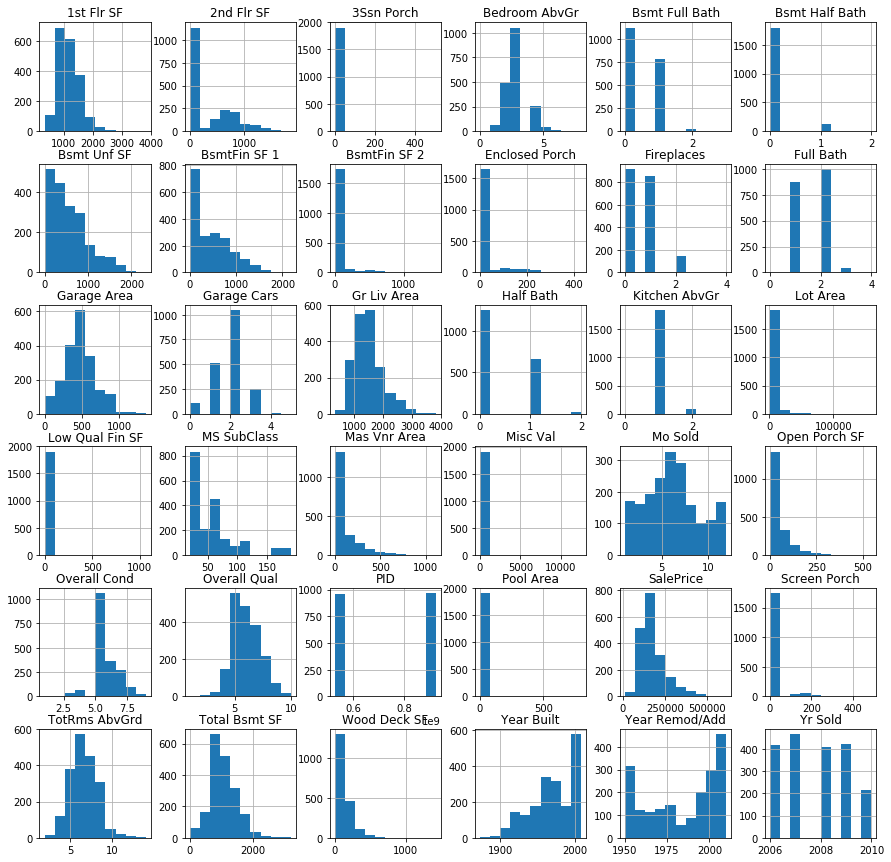

In [7]:
df_train.hist(figsize=(15,15)); # Checking the distributions of numeric features

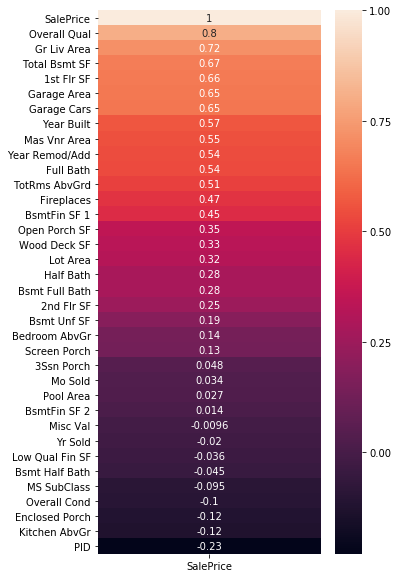

In [50]:
# Checking which variables are most correlated with sale price
plt.figure(figsize=(5,10))
sns.heatmap(df_train.corr()[['SalePrice']].sort_values(by='SalePrice',ascending=False), annot=True);

I will use the most correlated features as candidate features for my model. 

In [52]:
# Scatter is a function that allows me to plot different features against the mean sale price
def scatter(xcol, ycol = 'SalePrice', figsize = (15, 10), title = 'title', ylabel = 'ylabel', xlabel = 'xlabel', textsize = 20):
    plt.figure(figsize = figsize);
    plt.title(title, size = textsize);
    plt.ylabel(ylabel, size = textsize);
    plt.xlabel(xlabel, size = textsize);
    plt.xticks(size = textsize);
    plt.yticks(size = textsize);
    plt.scatter(df_train[xcol], df_train[ycol], color = 'tab:orange');
#Citation: Raffy :D

Since I am looking to recommend what the crew members can improve on to add value to the property they are working on, I will plot each numeric feature they have control over against the mean sale price to see if there are any correlations.

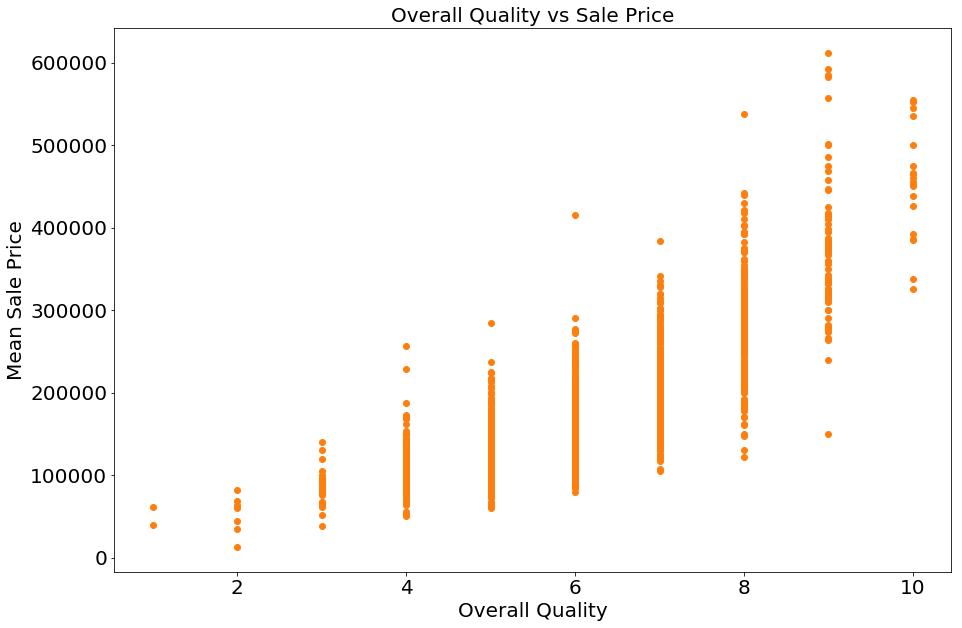

In [53]:
scatter('Overall Qual', title = 'Overall Quality vs Sale Price', xlabel = 'Overall Quality', ylabel = 'Mean Sale Price')

It seems overall quality is positively correlated with sale price.

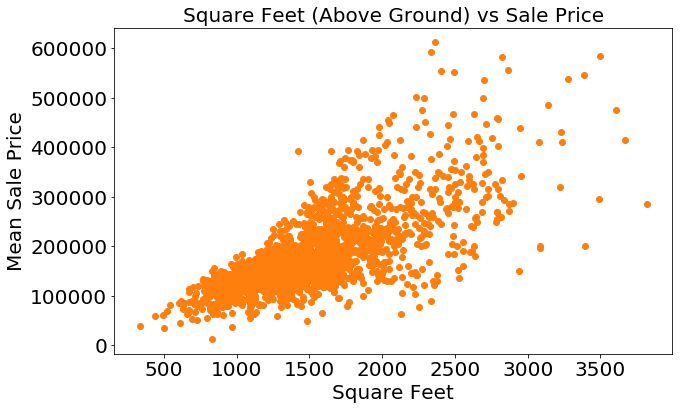

In [12]:
scatter('Gr Liv Area', figsize = (10,6), title = 'Square Feet (Above Ground) vs Sale Price', xlabel = 'Square Feet', ylabel = 'Mean Sale Price')

Total area above ground also is positively correlated with sale price. 

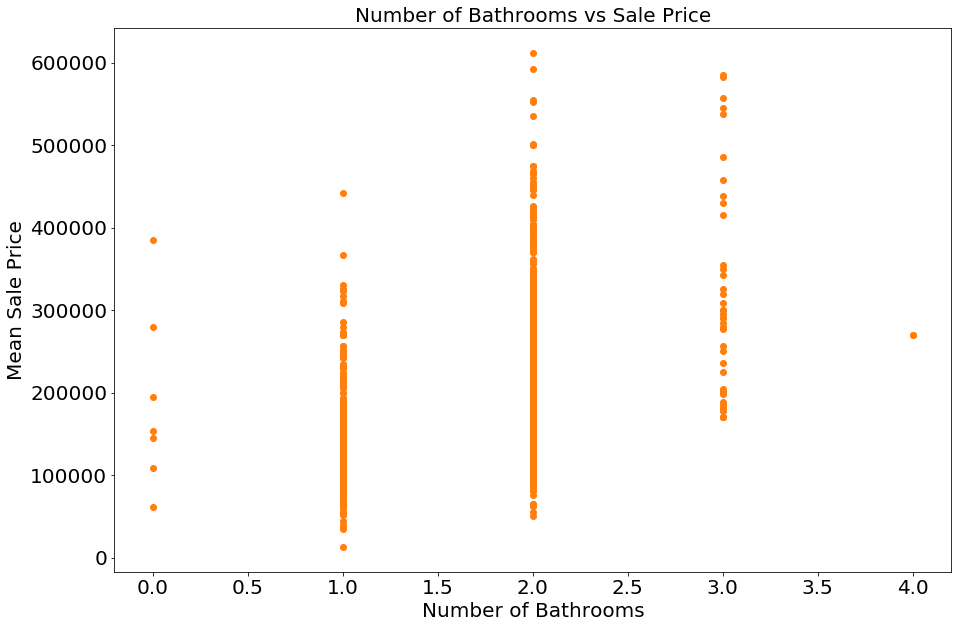

In [54]:
scatter('Full Bath', title = 'Number of Bathrooms vs Sale Price', xlabel = 'Number of Bathrooms', ylabel = 'Mean Sale Price')

There is a weak positive correlation here. I think a bar graph might be better for this.

In [22]:
# This function allows me to plot different categorical features against mean sale price in a bar chart
def mean_bar(col, figsize = (15, 8), title = 'title', x_label = 'x_label', textsize = 20):
    plt.figure(figsize = figsize);
    plt.title(title, size = textsize);
    plt.ylabel('Mean Sale Price', size = textsize);
    plt.xlabel(x_label, size = textsize);
    plt.xticks(size = textsize);
    plt.yticks(size = textsize);
    df_train.groupby(col).agg('mean')['SalePrice'].plot(kind = 'bar', color='tab:orange')

In [ ]:
# This is the horixontal version of the above function
def mean_bar_h(col, figsize = (15, 8), title = 'title', y_label = 'y_label', x_label = 'x_label', textsize = 20):
    plt.figure(figsize = figsize);
    plt.title(title, size = textsize);
    plt.ylabel(y_label, size = textsize);
    plt.xlabel(x_label, size = textsize);
    plt.xticks(size = textsize);
    plt.yticks(size = textsize);
    df_train.groupby(col).agg('mean')['SalePrice'].plot(kind = 'barh', color='tab:orange')

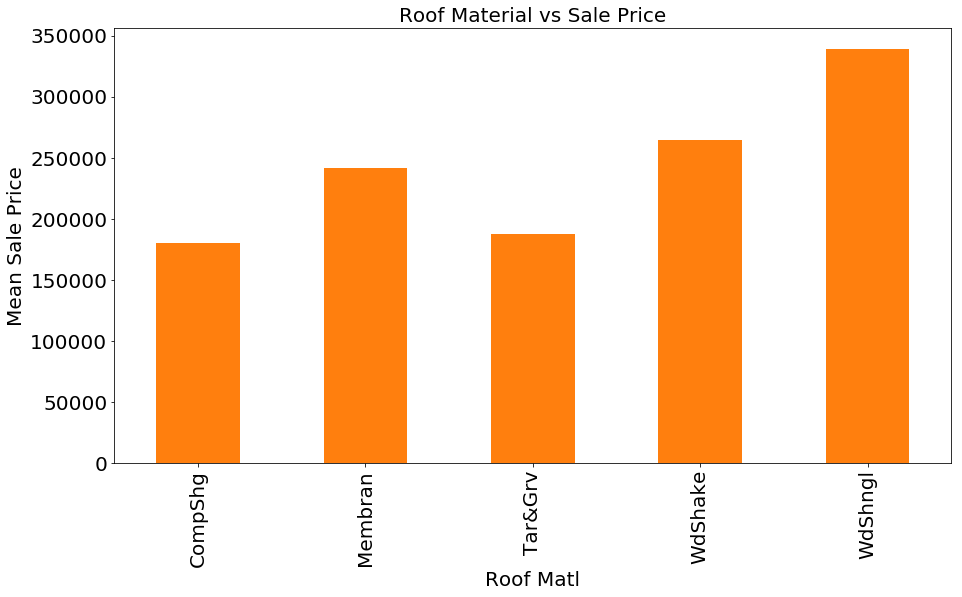

In [56]:
mean_bar('Roof Matl', title = 'Roof Material vs Sale Price')

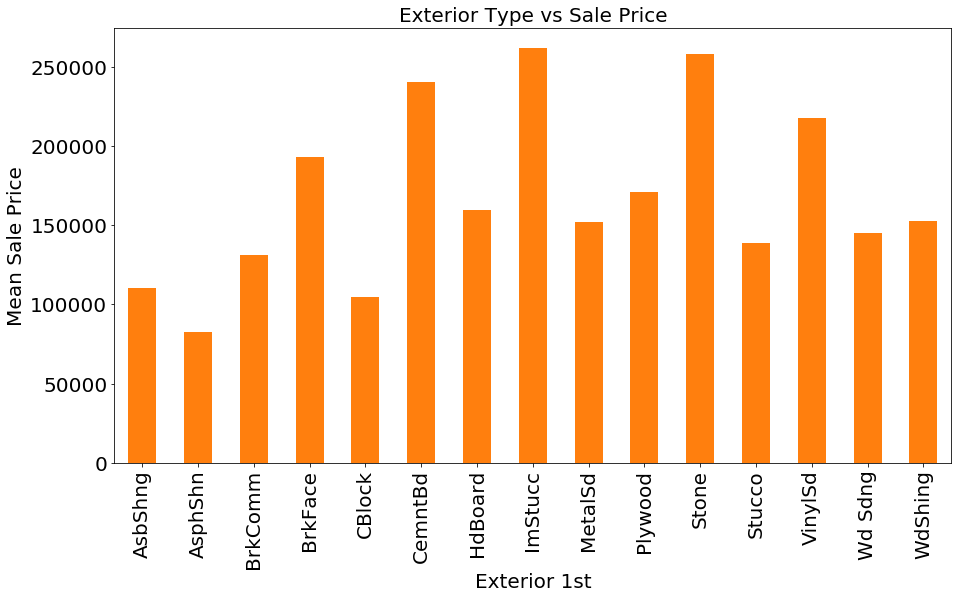

In [58]:
mean_bar('Exterior 1st', title = 'Exterior Type vs Sale Price')

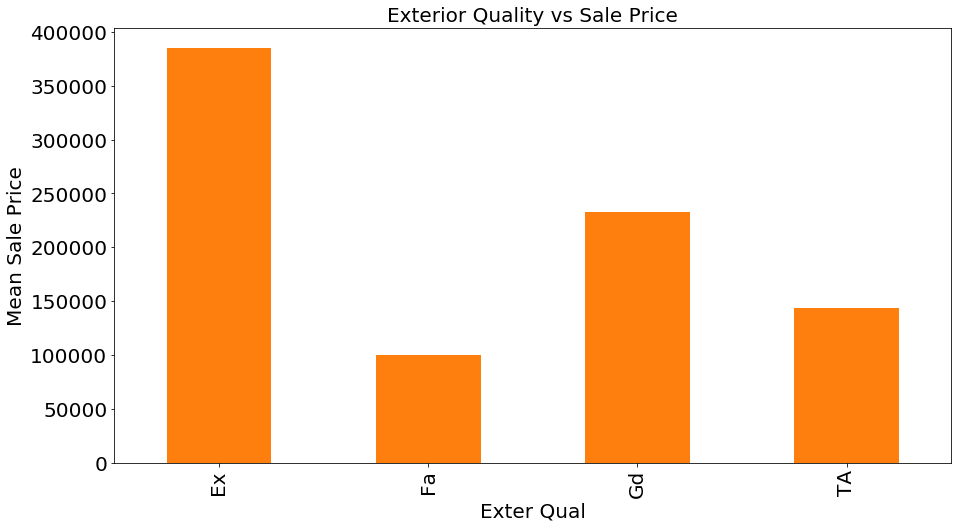

In [59]:
mean_bar('Exter Qual', title = 'Exterior Quality vs Sale Price')

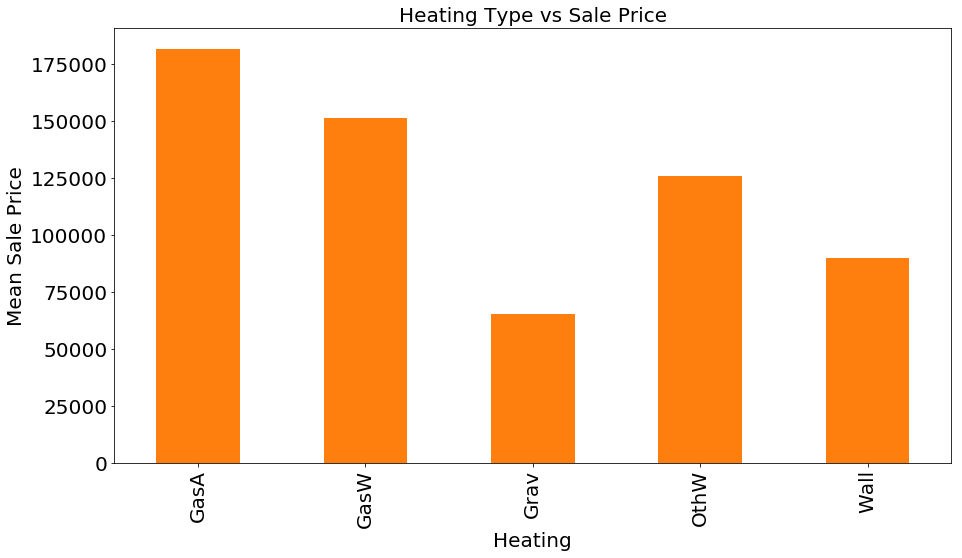

In [60]:
mean_bar('Heating', title = 'Heating Type vs Sale Price')

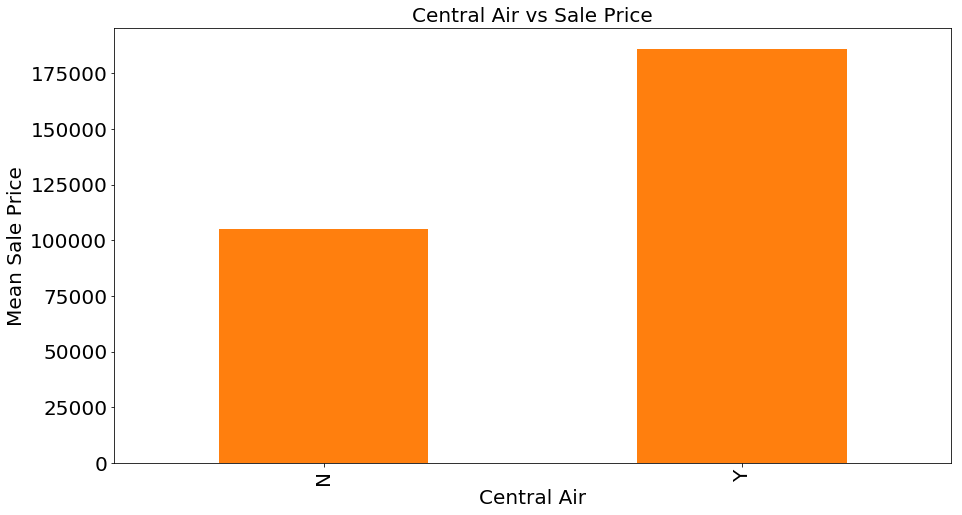

In [61]:
mean_bar('Central Air', title = 'Central Air vs Sale Price')

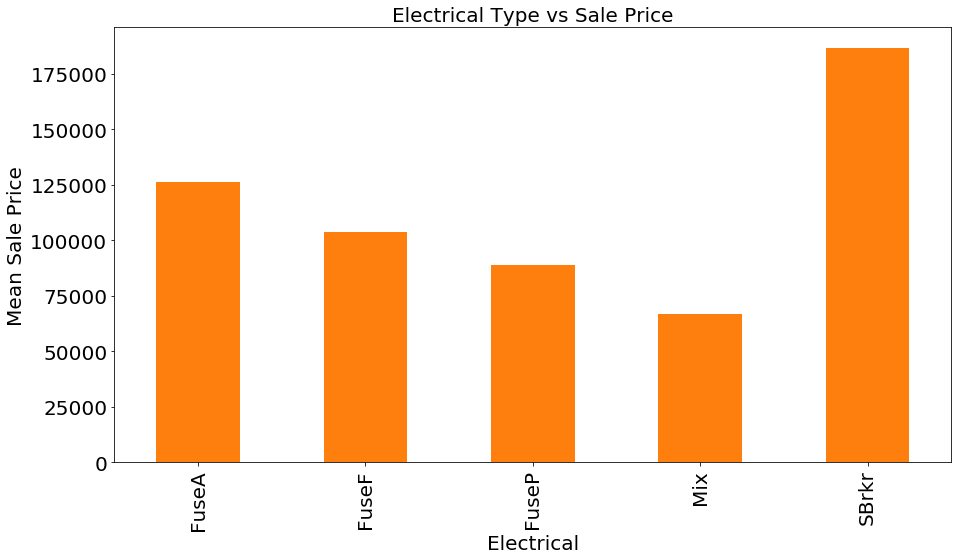

In [62]:
mean_bar('Electrical', title = 'Electrical Type vs Sale Price')

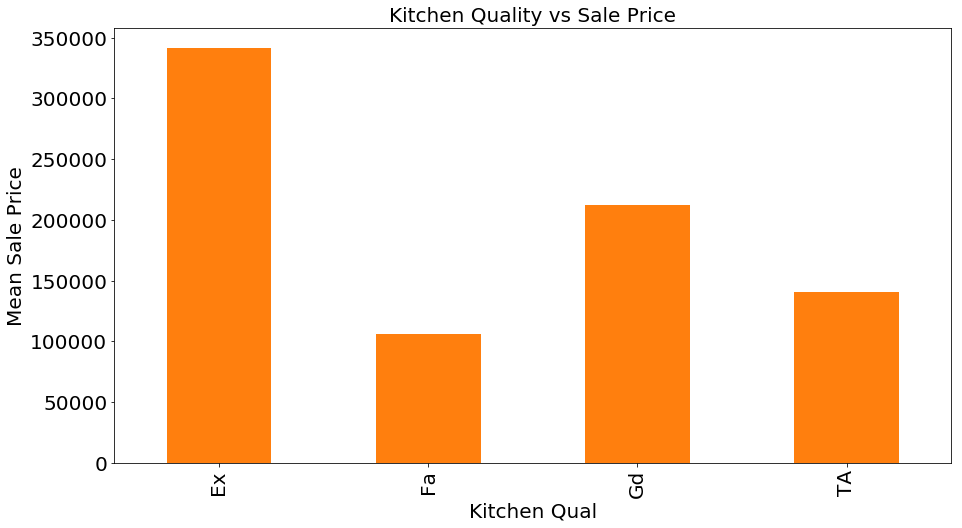

In [63]:
mean_bar('Kitchen Qual', title = 'Kitchen Quality vs Sale Price')

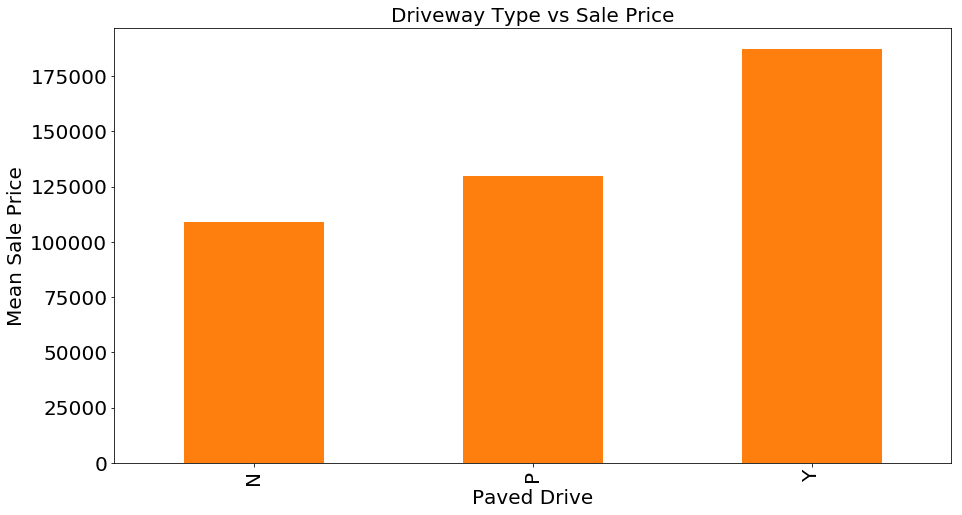

In [40]:
mean_bar('Paved Drive', title = 'Driveway Type vs Sale Price', x_label = 'Driveway Type')

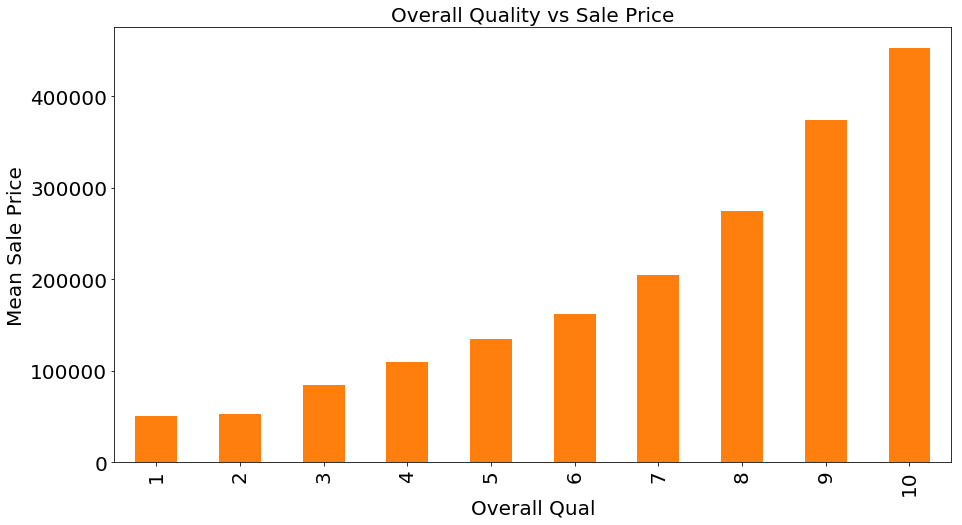

In [41]:
mean_bar('Overall Qual', title = 'Overall Quality vs Sale Price')

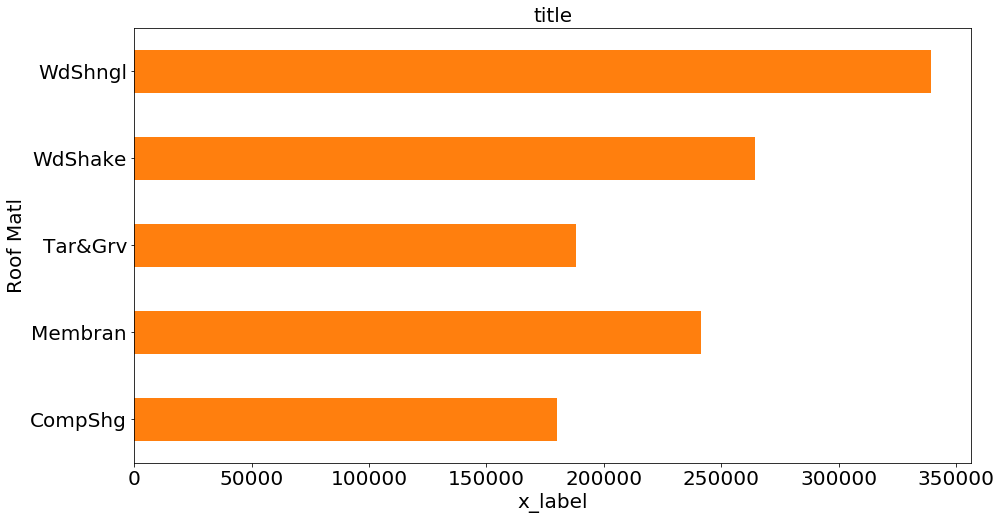

In [43]:
mean_bar_h('Roof Matl')

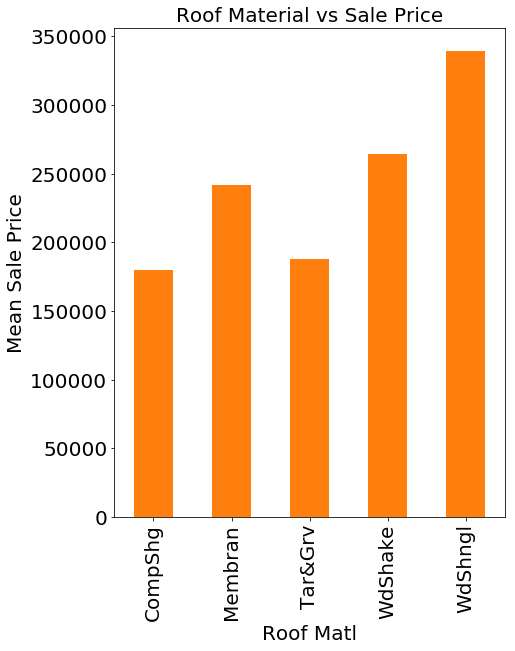

In [44]:
mean_bar('Roof Matl', figsize=(7,9), title = 'Roof Material vs Sale Price', x_label = 'Material')

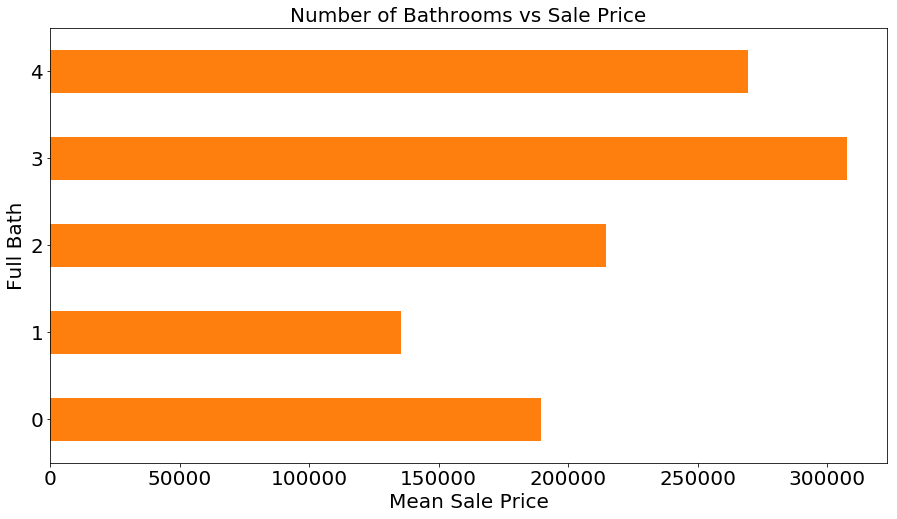

In [45]:
mean_bar_h('Full Bath', title = 'Number of Bathrooms vs Sale Price', x_label = 'Mean Sale Price', y_label = 'Bathrooms')